# Create a model to predict charges for smokers

In [30]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import plotly.express as px
from urllib.request import urlretrieve 

## Load Dataset

In [2]:
medical_df = pd.read_csv('/home/juto/Desktop/ML_libraries/scikit-learn/data/medical-charges.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Set Plot Frame

In [3]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Get the smoker data

In [4]:
smoker_df = medical_df[medical_df['smoker'] == 'yes']
smoker_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


<Axes: title={'center': 'Age vs Charges'}, xlabel='age', ylabel='charges'>

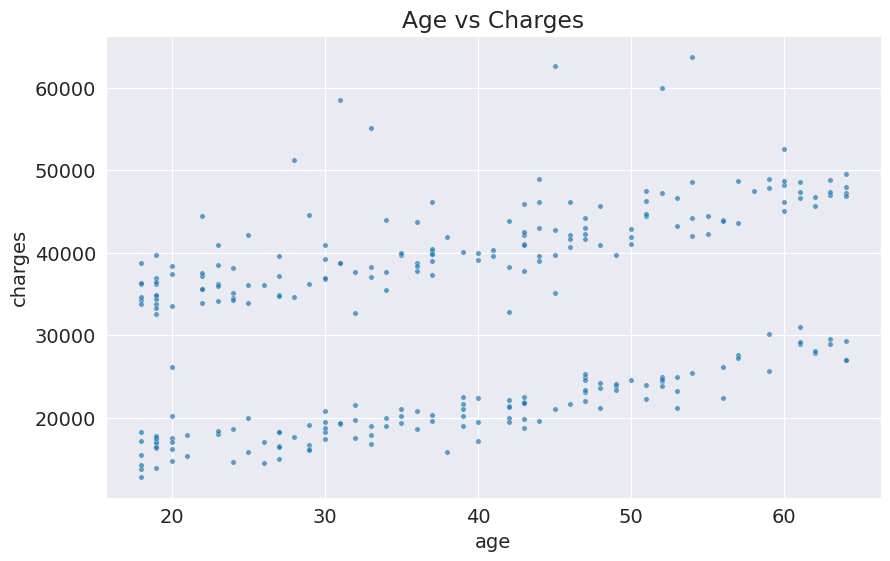

In [5]:
plt.title('Age vs Charges')
sns.scatterplot(smoker_df, x='age', y='charges', alpha=0.7, s=15)

## Basic Modelling 

In [6]:
"""
this is our first machine learning model
linear regression modelling
"""
def estimate_charges(age, w, b):
    return w * age + b

In [7]:
ages = smoker_df.age
ages

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [8]:
w = 50
b =100

estimated_charges = estimate_charges(ages, w, b)
estimated_charges

0       1050
11      3200
14      1450
19      1600
23      1800
        ... 
1313    1050
1314    1600
1321    3200
1323    2200
1337    3150
Name: age, Length: 274, dtype: int64

Text(0, 0.5, 'Estimated Chrges')

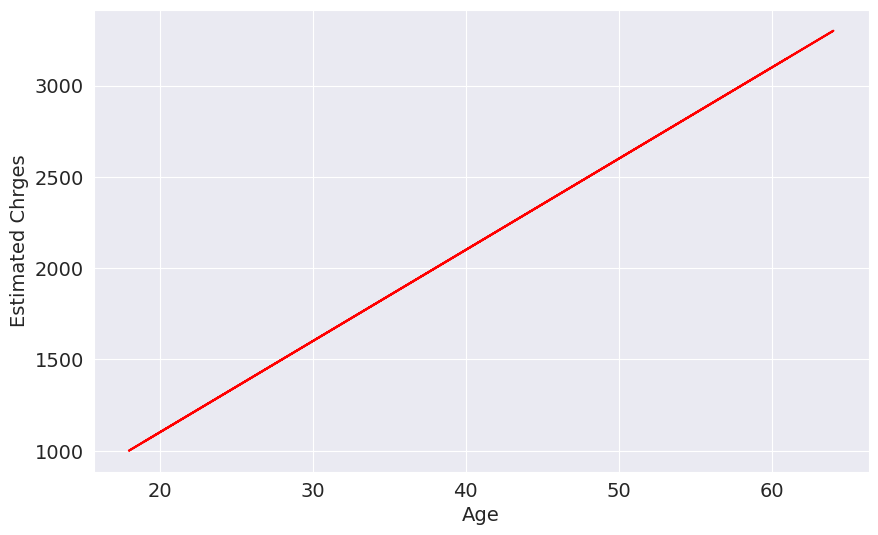

In [9]:
plt.plot(ages, estimated_charges, 'r-')
plt.xlabel('Age')
plt.ylabel('Estimated Chrges')

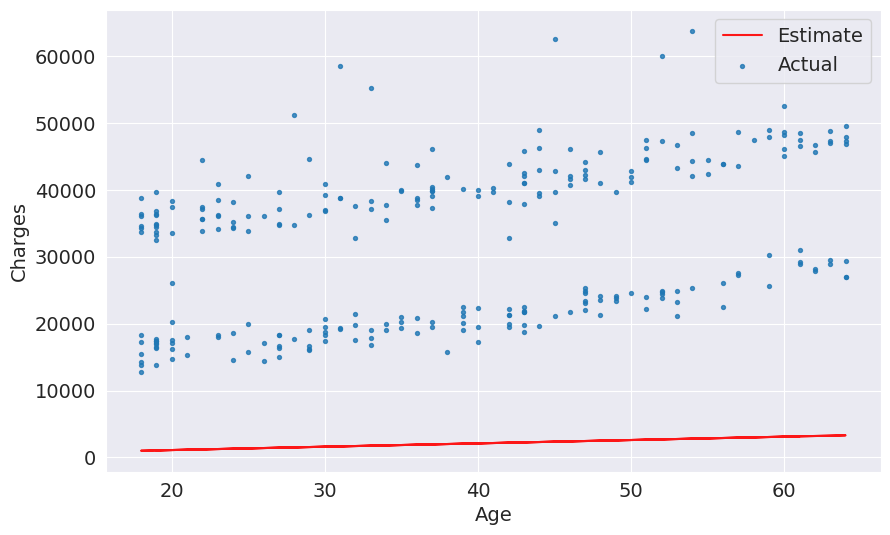

In [10]:
target = smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9)
plt.scatter(ages,target, s=8, alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate', 'Actual'])
plt.show()

In [11]:
def try_parameters(w,b):
    ages = smoker_df.age
    target= smoker_df.charges
    
    estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    plt.show()

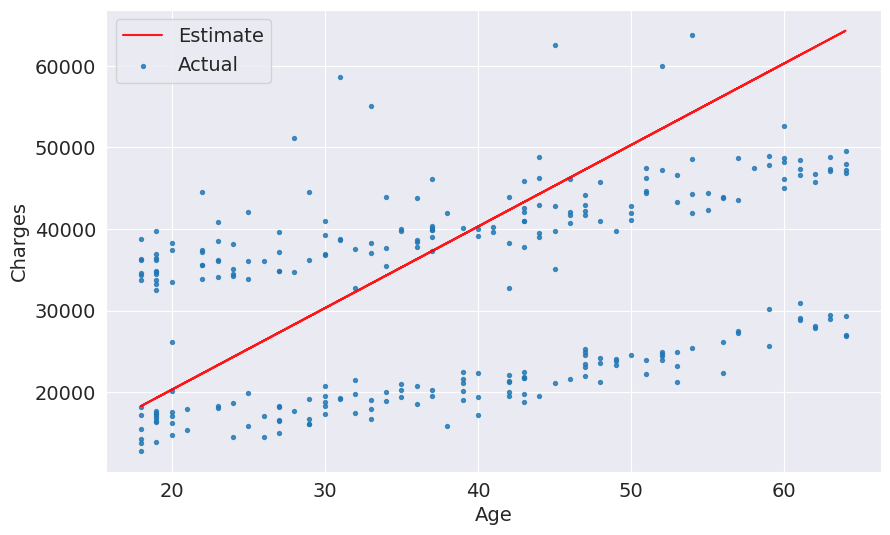

In [12]:
try_parameters(1000, 300)

In [28]:
"""
RMSE is root mean sqr error 
this is the loss function for machine learning models 
basically to see how mad your models is.
"""
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [18]:
w = 50
b =100

In [19]:
age = smoker_df.age
age

0       19
11      62
14      27
19      30
23      34
        ..
1313    19
1314    30
1321    62
1323    42
1337    61
Name: age, Length: 274, dtype: int64

In [ ]:
def try_parameters(w,b):
    ages = smoker_df.age
    target= smoker_df.charges
    predicted = estimated_charges= estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual'])
    
    loss = rmse(targets, predicted)
    plt.show()
    print("RMSE LOSS: ", loss)

In [29]:
targets = smoker_df['charges']
prediction = estimate_charges(age, w, b)
rmse(target, prediction)

np.float64(32074.58722734571)

### Linear Regression Model


In [31]:
model = LinearRegression()

In [34]:
inputs, targets = smoker_df[['age']], smoker_df['charges']

# Create and train the model
model.fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute the loss to evaluate the model

loss =rmse(targets, predictions)
print('LOSS: ', loss) 
print('PREDICTIONS: ', predictions) 

LOSS:  10711.00334810241
PREDICTIONS:  [26093.642567   39218.85945773 28535.54338388 29451.25619021
 30672.20659865 29756.49379232 27009.35537333 28840.78098599
 30977.44420076 38608.38425351 31282.68180287 34945.53302819
 31282.68180287 37997.90904929 25788.40496489 36471.72103874
 26398.88016911 28840.78098599 28535.54338388 27009.35537333
 31587.91940498 34029.82022186 37692.67144718 38303.1466514
 39829.33466195 37387.43384507 31893.15700709 38913.62185562
 26398.88016911 39524.09705984 29146.0185881  33724.58261975
 26093.642567   30061.73139443 30672.20659865 29451.25619021
 34335.05782397 33114.10741553 34945.53302819 25788.40496489
 29451.25619021 33114.10741553 25788.40496489 39524.09705984
 31282.68180287 28535.54338388 30977.44420076 26093.642567
 33114.10741553 32503.63221131 26093.642567   27314.59297544
 39524.09705984 25788.40496489 39524.09705984 36776.95864085
 35556.00823241 37387.43384507 26093.642567   26398.88016911
 36166.48343663 26093.642567   34335.05782397 325

In [35]:
model.coef_

array([305.23760211])

In [36]:
model.intercept_

np.float64(20294.128126915966)

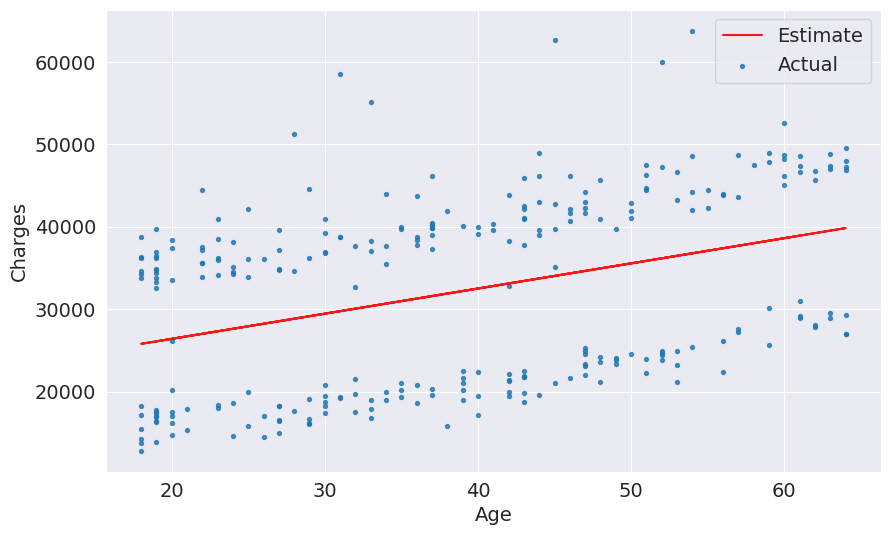

RMSE LOSS:  10711.00334810241


In [40]:
try_parameters(model.coef_, model.intercept_)

## SGDRegression model

In [45]:
inputs, targets = smoker_df[['age']], smoker_df['charges']

# Create and train the model
model2= SGDRegressor().fit(inputs, targets)

# Generate predictions
predictions = model2.predict(inputs)

# Compute the loss to evaluate the model2

loss = rmse(targets, predictions)
print('LOSS: ', loss) 


LOSS:  2879610332.8454866


In [48]:
model2.coef_

array([-1.56912852e+08])

In [49]:
model2.intercept_

array([4.1629022e+09])

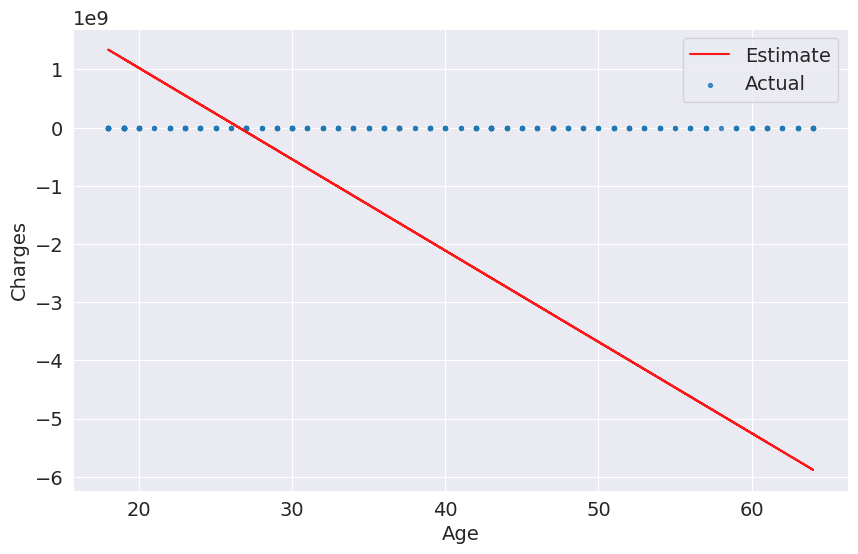

RMSE LOSS:  2879610332.8454866


In [46]:
try_parameters(model2.coef_, model2.intercept_)